In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import time
import unittest
import tqdm.notebook as tq
import solitaire_env
import sys
import seaborn as sns
sys.setrecursionlimit(10**6)

In [2]:
# import time
# start = time.time()


# count = 0
# actions = [0]*6
# fail = [0]*6
# different_states = []
# for j in tqdm(range(1000)):
#     en = solitaire_env.env()
#     for i in range(10000):

#         action = random.sample(range(6),1)[0]
        
#         actions[action]+=1

#         won,failed = en.step(action)
        
#         if failed:
#             fail[action]+=1
#         #print(i+1,action,won)
#         if won == True:
#             count+=1
#             break
#     different_states.append(len(en.hashable_map.keys()))

# print(count)
#print(time.time()-start)

In [3]:
#en.get_pile()

In [4]:
#en.get_foundation()

In [5]:
#en.get_tableau()

In [6]:

start = time.time()


count = 0

number_of_games = 800

action_type = {0:'tableau_to_foundation_reveal',\
               1:'to_foundation_stack',2:'tableau_to_tableau_reveal',\
               3:'pile_to_tableau',\
                4:'foundation_to_tableau',\
               5:'tableau_to_tableau_not_reveal'\
              }


actions_for_each_game = [0]*number_of_games
iterations_used_per_game = [0]*number_of_games
different_states_per_game = [0]*number_of_games

def greedy_policy(en,action_number,tot,action_freq,actions_matrix,game,fp_flag=False):
    
#     if action_number >= tot:
#         return False


    actions_m = []
    
    for step in range(tot):
        
        for action in range(6):
            
            won,taken = en.step(action,fp_flag)
            
             
            if won == True:
                action_freq[action]+=1
                actions_m.append(action)
                
                
                actions_matrix[game] = [game,actions_m,en.state] 
                return step,True
            if taken == True:
                action_freq[action]+=1
                actions_m.append(action)
                
                break

        if taken == False:
            
            actions_matrix[game] = [game,actions_m,en.state] 
            
            return step,False
        
       
    actions_matrix[game] = [game,actions_m,en.state] 
    
    
    
    return step,False
        
        
actions_matrix = [0]*number_of_games

start_states = {}

for this_game in tq.tqdm(range(number_of_games)):
    
    
    en = solitaire_env.env()
    tot = 20000
    action_freq = {0:0,1:0,2:0,3:0,4:0,5:0}
    
    start_states[game] = en.state
    step,won = greedy_policy(en,1,tot,action_freq,actions_matrix,this_game,fp_flag=True)
             
        
    if won == True:
        count+=1
        
    actions_for_each_game[this_game] = action_freq
    different_states_per_game[this_game] = len(en.hashable_map.keys())
    iterations_used_per_game[this_game] = step
    
print((time.time()-start)/60)


4626.155680894852


In [8]:
count


0

In [9]:

len(actions_matrix[0][1])

20000

In [10]:
action_count = [len(actions_matrix[i][1]) for i in range(number_of_games)]

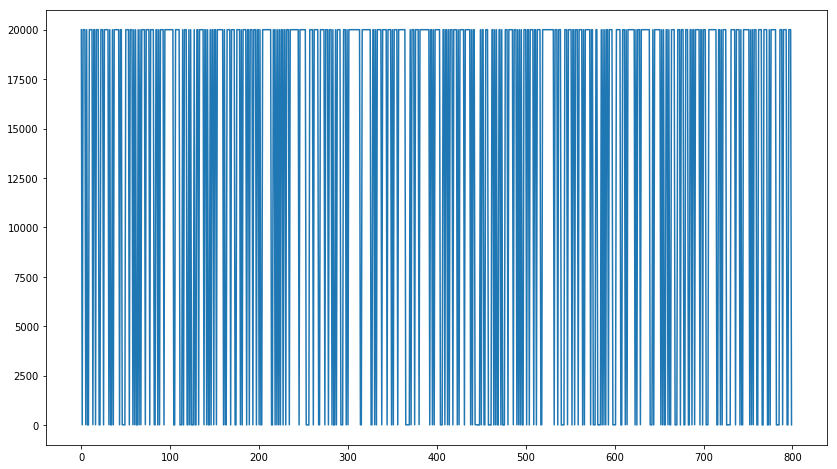

In [11]:
plt.figure(figsize=(14,8))
plt.plot(range(number_of_games),action_count)

In [12]:
actions_matrix.sort(key = lambda x:len(x[1]))

In [13]:
actions_matrix[0]

[564, [3, 3, 3, 3, 3], <solitaire_env.state at 0x7ff3a07560b8>]

In [14]:
actions_matrix[0][2]

In [15]:
en = solitaire_env.env()
en.state = actions_matrix[-1][2]

In [35]:
#actions_matrix[-1][1][-100:]

In [23]:
en.get_foundation()

printing foundation number 1 ********************
printing foundation number 2 ********************
printing foundation number 3 ********************
suit = diamond    color = red        number =     1 speciality = ACE        face = up   
suit = diamond    color = red        number =     2 speciality = None       face = up   
printing foundation number 4 ********************


In [24]:
en.get_pile()

suit = diamond    color = red        number =     4 speciality = None       face = up   
suit = spade      color = black      number =    11 speciality = JACK       face = up   
suit = club       color = black      number =    13 speciality = KING       face = up   
suit = club       color = black      number =     3 speciality = None       face = up   
suit = spade      color = black      number =     4 speciality = None       face = up   
suit = heart      color = red        number =     6 speciality = None       face = up   
suit = diamond    color = red        number =     9 speciality = None       face = up   
suit = heart      color = red        number =     4 speciality = None       face = up   
suit = diamond    color = red        number =    13 speciality = KING       face = up   
suit = spade      color = black      number =     7 speciality = None       face = up   
suit = heart      color = red        number =     5 speciality = None       face = up   
suit = heart      col

In [25]:
en.get_tableau()

printing tableau number 1 ********************
suit = heart      color = red        number =    13 speciality = KING       face = up   
suit = club       color = black      number =    12 speciality = QUEEN      face = up   
printing tableau number 2 ********************
suit = spade      color = black      number =     8 speciality = None       face = up   
suit = heart      color = red        number =     7 speciality = None       face = up   
printing tableau number 3 ********************
suit = club       color = black      number =     5 speciality = None       face = up   
suit = diamond    color = red        number =     3 speciality = None       face = up   
suit = diamond    color = red        number =    11 speciality = JACK       face = up   
suit = spade      color = black      number =    10 speciality = None       face = up   
suit = heart      color = red        number =     9 speciality = None       face = up   
printing tableau number 4 ********************
suit = spad

In [39]:
max_step_games = []
for i in range(number_of_games):
    if len(actions_matrix[i][1]) == tot:
        max_step_games.append([actions_matrix[i][0],"".join([str(x) for  x in actions_matrix[i][1]])])
        

In [40]:
len(max_step_games)

543

In [42]:
max_step_games[1]

[2,
 '1111133333333414141414141414141414141414141414141414141414141414141414141414141414141414141414141414141414141414141414141414141414141414141414141414141414141414141414141414141414141414141414141414141414141414141414141414141414141414141414141414141414141414141414141414141414141414141414141414141414141414141414141414141414141414141414141414141414141414141414141414141414141414141414141414141414141414141414141414141414141414141414141414141414141414141414141414141414141414141414141414141414141414141414141414141414141414141414141414141414141414141414141414141414141414141414141414141414141414141414141414141414141414141414141414141414141414141414141414141414141414141414141414141414141414141414141414141414141414141414141414141414141414141414141414141414141414141414141414141414141414141414141414141414141414141414141414141414141414141414141414141414141414141414141414141414141414141414141414141414141414141414141414141414141414141414141414141414141414141414141414141414141414141414141414141414

[0, 9996, 0, 11, 9993, 0]


<BarContainer object of 6 artists>

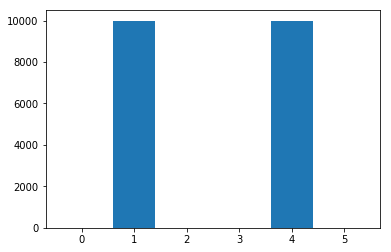

In [45]:
game_no = max_step_games[2][0]
mp = actions_for_each_game[game_no]
values = [mp[i] for i in range(6)]
print(values)
plt.bar([0,1,2,3,4,5],values)

In [28]:
it = pd.DataFrame(data = {"iterations":iterations_used_per_game})['iterations'].value_counts()

In [29]:
it

19999    543
14        32
15        26
12        23
17        22
13        21
16        18
18        17
11        15
19        12
8         12
10        11
20        10
9         10
21         7
22         5
23         4
7          3
6          3
24         2
5          2
27         1
25         1
Name: iterations, dtype: int64

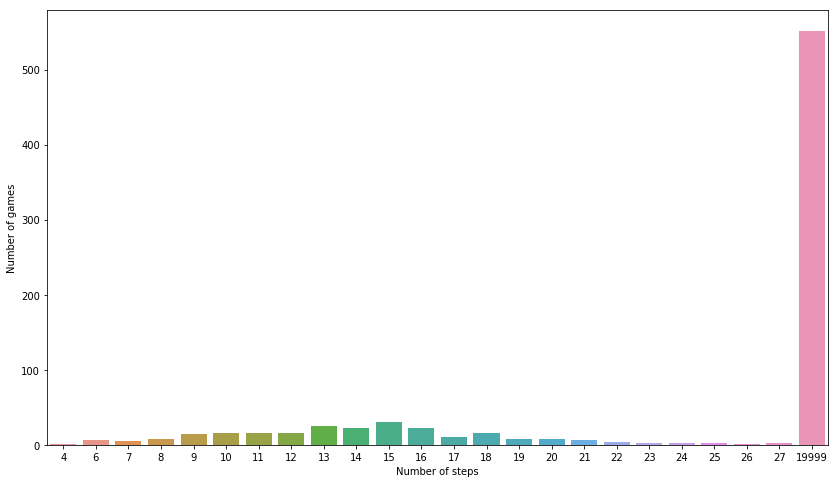

In [43]:
plt.figure(figsize=(14,8))
plt.xlabel("Number of steps")
plt.ylabel("Number of games")
sns.barplot(it.index,it.values)
plt.savefig("Foundation_Progression_included.jpg")

[1, 9, 2, 15, 2, 2]


<BarContainer object of 6 artists>

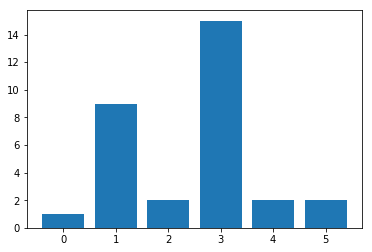

In [24]:
x = 10
mp = actions_for_each_game[x]
values = [mp[i] for i in range(6)]
print(values)
plt.bar([0,1,2,3,4,5],values)

In [43]:
en.get_foundation()

printing foundation number 1 ********************
suit = club       color = black      number =     1 speciality = ACE        face = up   
printing foundation number 2 ********************
printing foundation number 3 ********************
suit = diamond    color = red        number =     1 speciality = ACE        face = up   
printing foundation number 4 ********************


In [ ]:
Hashing function improve

look for sets

Graph Representation for neural net

